
## Data 602 - Project 3
### Group Members: Maliat Islam, Layla Quinones & Karim Hammoud

Project 3 - This is a Team Project!

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the devtest set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

Source: Natural Language Processing with Python, exercise 6.10.2.

In [2]:
# SEETING UP THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import names
import random
from nltk.classify import apply_features
nltk.download('names')
import plotly.graph_objs as go

[nltk_data] Downloading package names to /Users/karim/nltk_data...
[nltk_data]   Package names is already up-to-date!


### Loading datasets and creating dataframe

For this project firstly name dataset from NLTK is downloaded.Then it was transformed into a dtaframe

In [3]:
# Get the names and genders
classify_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
random.shuffle(classify_names)

In [4]:
# count the number of names in each gender
Gender_names_g= [g for (n,g) in classify_names]
Gender_names_m = Gender_names_g.count('male')
Gender_names_f = Gender_names_g.count('female')
print("Total Male: {} and Female: {} in dataset of size: {}.".format(Gender_names_m,Gender_names_f,len(Gender_names_g)))

Total Male: 2943 and Female: 5001 in dataset of size: 7944.


In [5]:
# Data frame
data = pd.DataFrame.from_dict(dict(classify_names), orient='index', columns=['gender']).reset_index()
data.columns = 'name', 'Gender' 
data.head()

,name,Gender
0,Geralda,female
1,Wiley,male
2,Vicki,female
3,Gretchen,female
4,Margo,female


Base Gender Feature

In [6]:
def gender_features_base(word):
    return {'last_letter': word[-1]}

In [7]:
gender_features_base('Stefan')

{'last_letter': 'n'}

### Adding gender identification features:
Male and female names have distinct characteristics such as names ending in a, e, and i are likely to be female, while names ending in k, o, r, s, and t are likely to be male. We have build a classifier to model these differences more precisely. We will look for the last letter of a given name.

In [8]:
from nltk.tokenize.sonority_sequencing import SyllableTokenizer

SSP = SyllableTokenizer()


# create various feature columns for exploration
data['length'] = data['name'].str.len()
data['first_letter'] = data['name'].str[0]
data['last_letter'] = data['name'].str[-1]
data['vowel_last_letter'] = data['last_letter'].isin([*'aeiou'])
data['vowel_first_letter'] = data['first_letter'].isin([*'aeiou'])
data['vowels'] = data['name'].str.replace(r'[^aeiou]', '')
data['consonants'] = data['name'].str.replace(r'[aeiou]', '')
data['vowel_count'] = data['vowels'].str.len()
data['consonant_count'] = data['consonants'].str.len()
data["suffix2v"]= data['name'].str[-2:]
data["preffix2v"]= data['name'].str[:2]
data['syllables'] = data['name'].apply(lambda x: len(SSP.tokenize(x)))

# preview data
data.head()

/Users/karim/opt/anaconda3/lib/python3.7/site-packages/nltk/tokenize/sonority_sequencing.py:104: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  " assigning as vowel: '{}'".format(c)


,name,Gender,length,first_letter,last_letter,vowel_last_letter,vowel_first_letter,vowels,consonants,vowel_count,consonant_count,suffix2v,preffix2v,syllables
0,Geralda,female,7,G,a,True,False,eaa,Grld,3,4,da,Ge,3
1,Wiley,male,5,W,y,False,False,ie,Wly,2,3,ey,Wi,2
2,Vicki,female,5,V,i,True,False,ii,Vck,2,3,ki,Vi,2
3,Gretchen,female,8,G,n,False,False,ee,Grtchn,2,6,en,Gr,2
4,Margo,female,5,M,o,True,False,ao,Mrg,2,3,go,Ma,2


### Assigning data to test set, devtest set and training set:

In [9]:

random.shuffle(classify_names)
test_set = classify_names[:500]
devtest_set = classify_names[500:1000]   
train_set =classify_names[1000:]

In [10]:
#### summary statistics
data.groupby('Gender').mean()

,length,vowel_last_letter,vowel_first_letter,vowel_count,consonant_count,syllables
Gender,,,,,,
female,6.153367,0.726309,0.0,2.501247,3.652120,2.318579
male,5.934948,0.233104,0.0,2.045537,3.889411,1.903867


### Visualizing different features:
Different features such as name length,peffix,suffix,first and last letters of names on the basis of gender has been visualized.

In [11]:
males = data.loc[data.Gender=='male']
females = data.loc[data.Gender=='female']

In [12]:

males['len'] = [len(x) for x in males.name]
females['len'] = [len(x) for x in females.name]

/Users/karim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/karim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
male_names_len = males.len.value_counts().sort_index()
female_names_len = females.len.value_counts().sort_index()

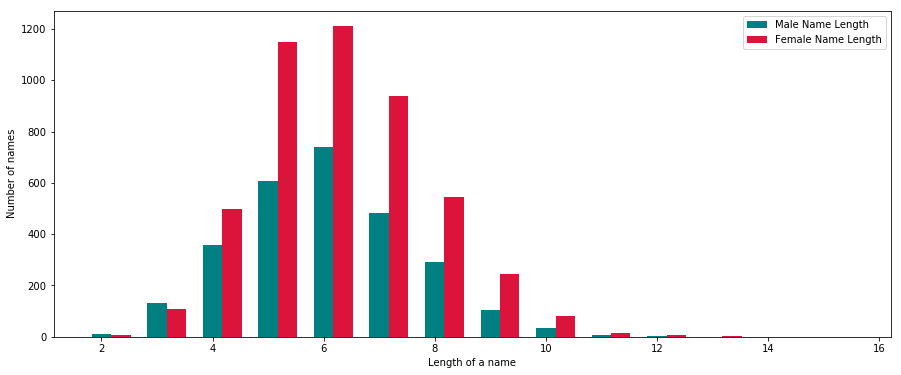

In [14]:
fig,ax = plt.subplots(figsize=[15,6])
labels = np.arange(1,10)
width=0.35
plt.bar(male_names_len.index, male_names_len.values, 
        width=width, color='teal', label='Male Name Length')
plt.bar(female_names_len.index+width, female_names_len.values,
        width=width, color='crimson', label='Female Name Length')

plt.xlabel('Length of a name')
plt.ylabel('Number of names')
plt.legend()
plt.show()

In [15]:

# Setting up the X and y
X = data.drop(columns=['name', 'Gender'])
y = data['Gender']

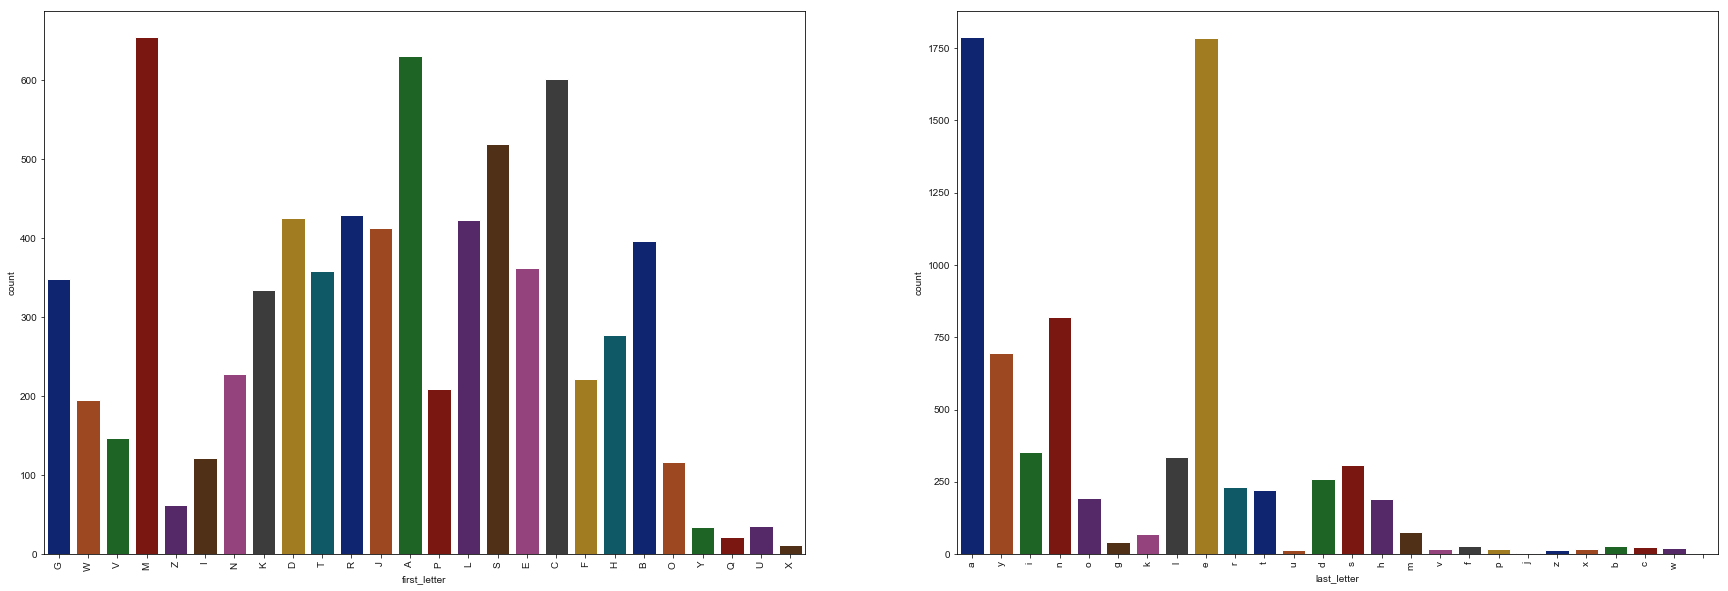

In [16]:
# Vigualize the first and last letters in our data for both genders
cat_cols = X.loc[:, [col for col in X.columns if 'gram' not in col]].select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.set(font_scale=2)

for var, subplot in zip(cat_cols[:2], ax.flatten()):
    sns.countplot(x=var, data=data, ax=subplot, palette="dark")

    
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
       


/Users/karim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/karim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


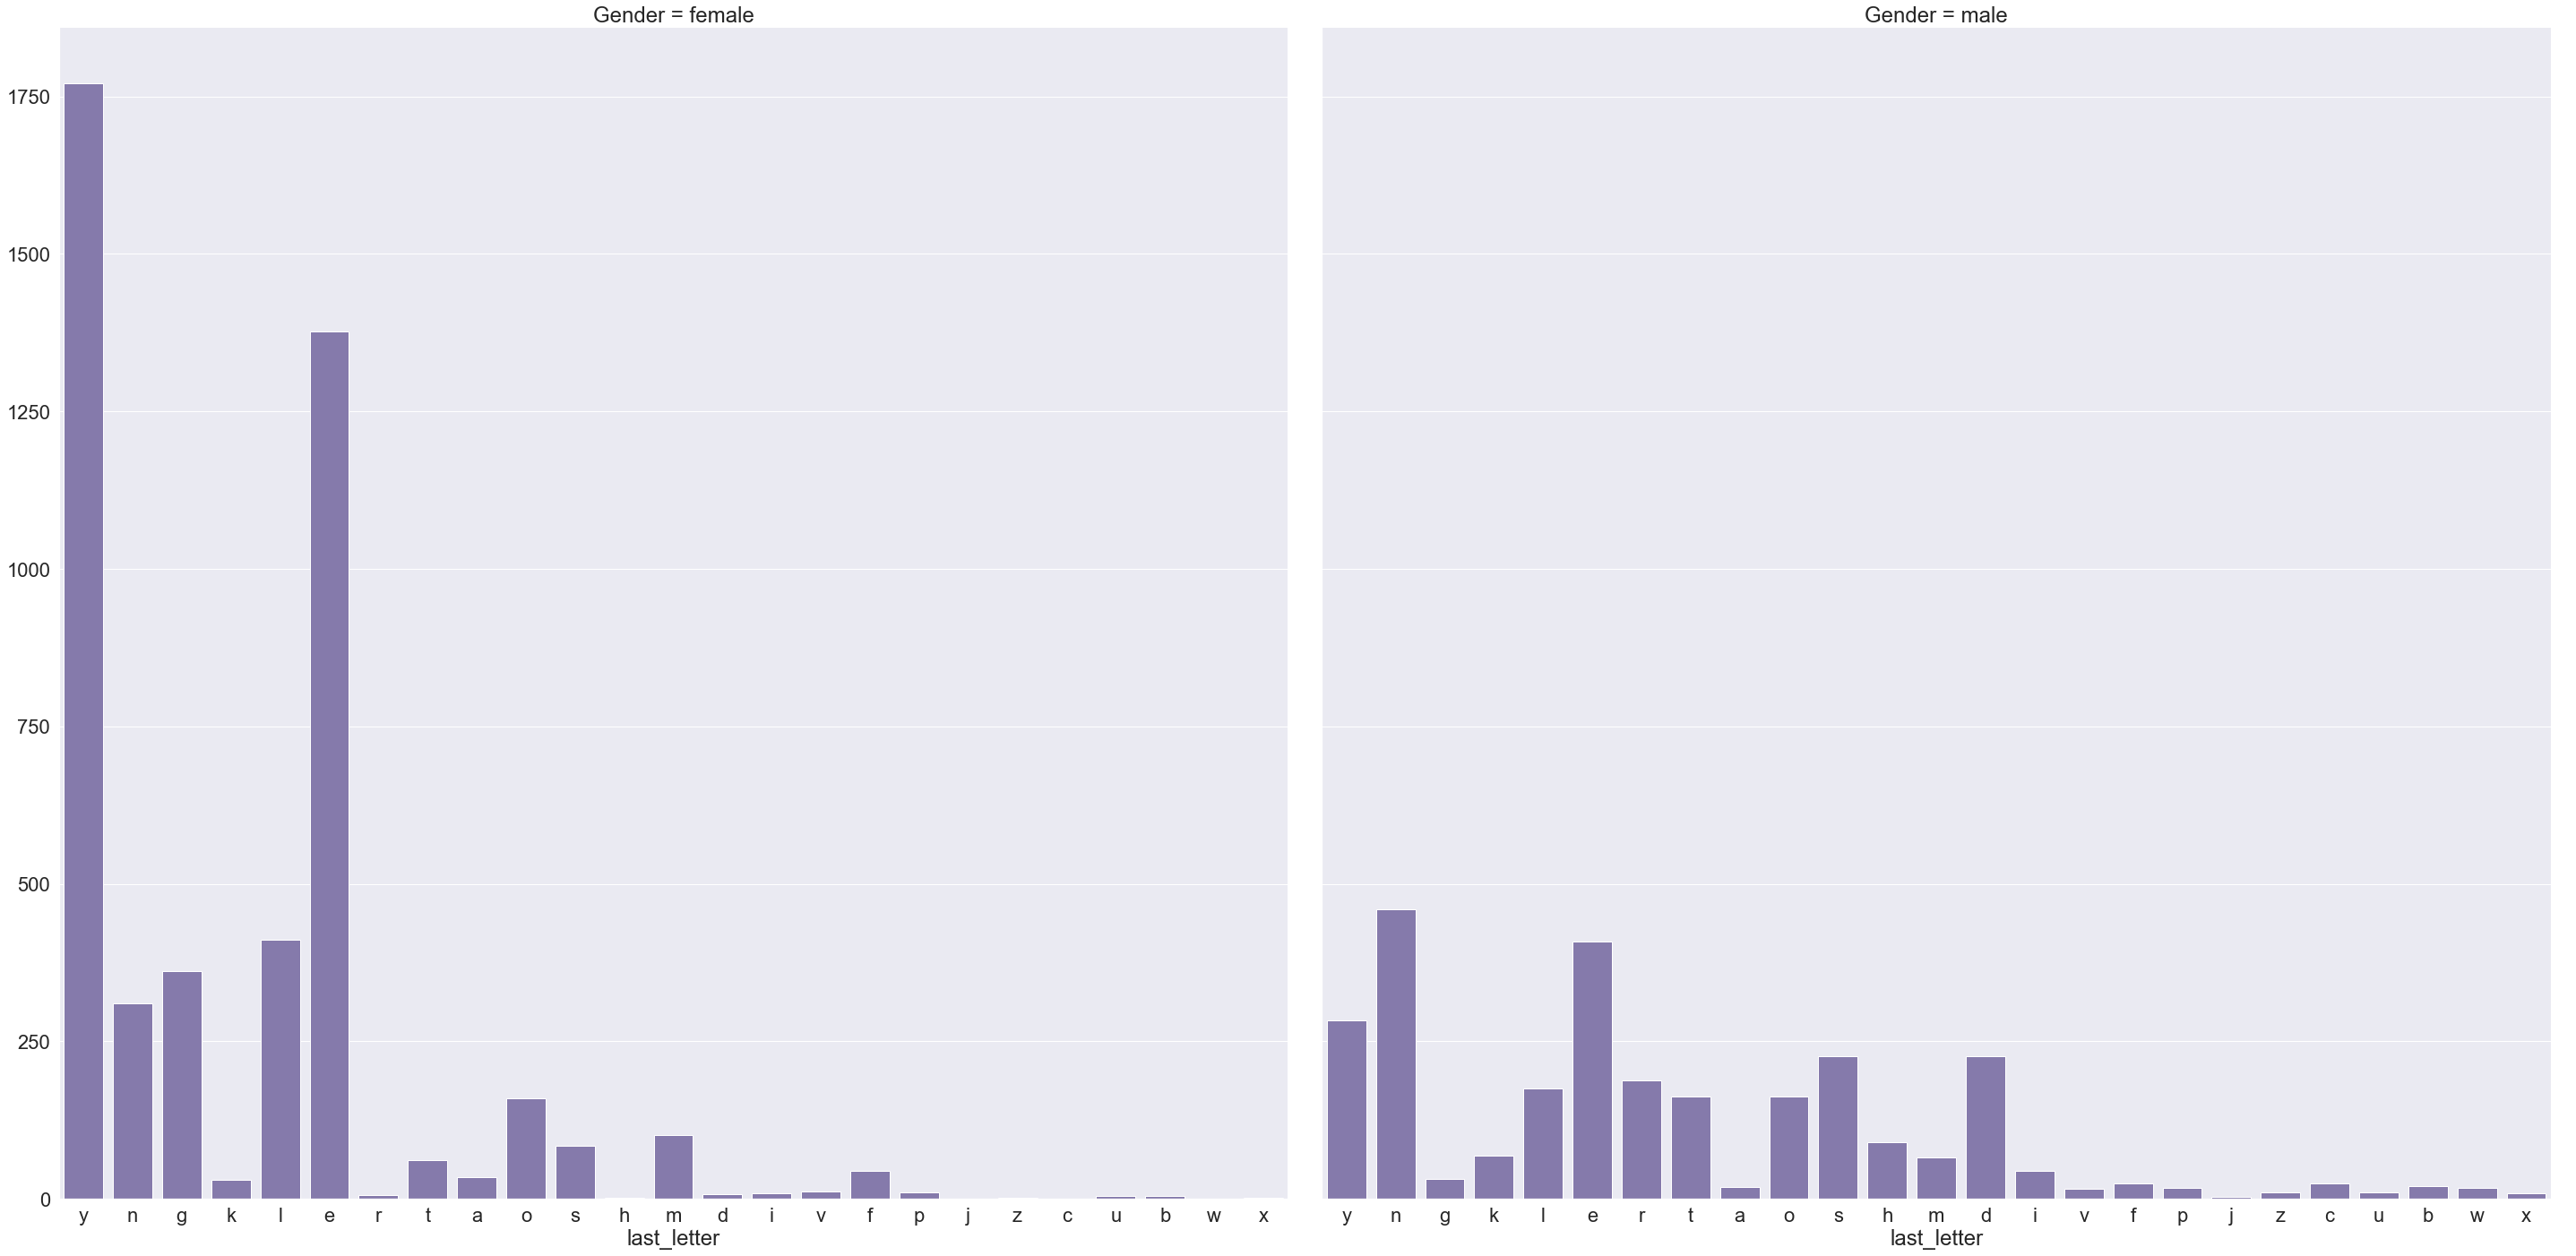

/Users/karim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/karim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


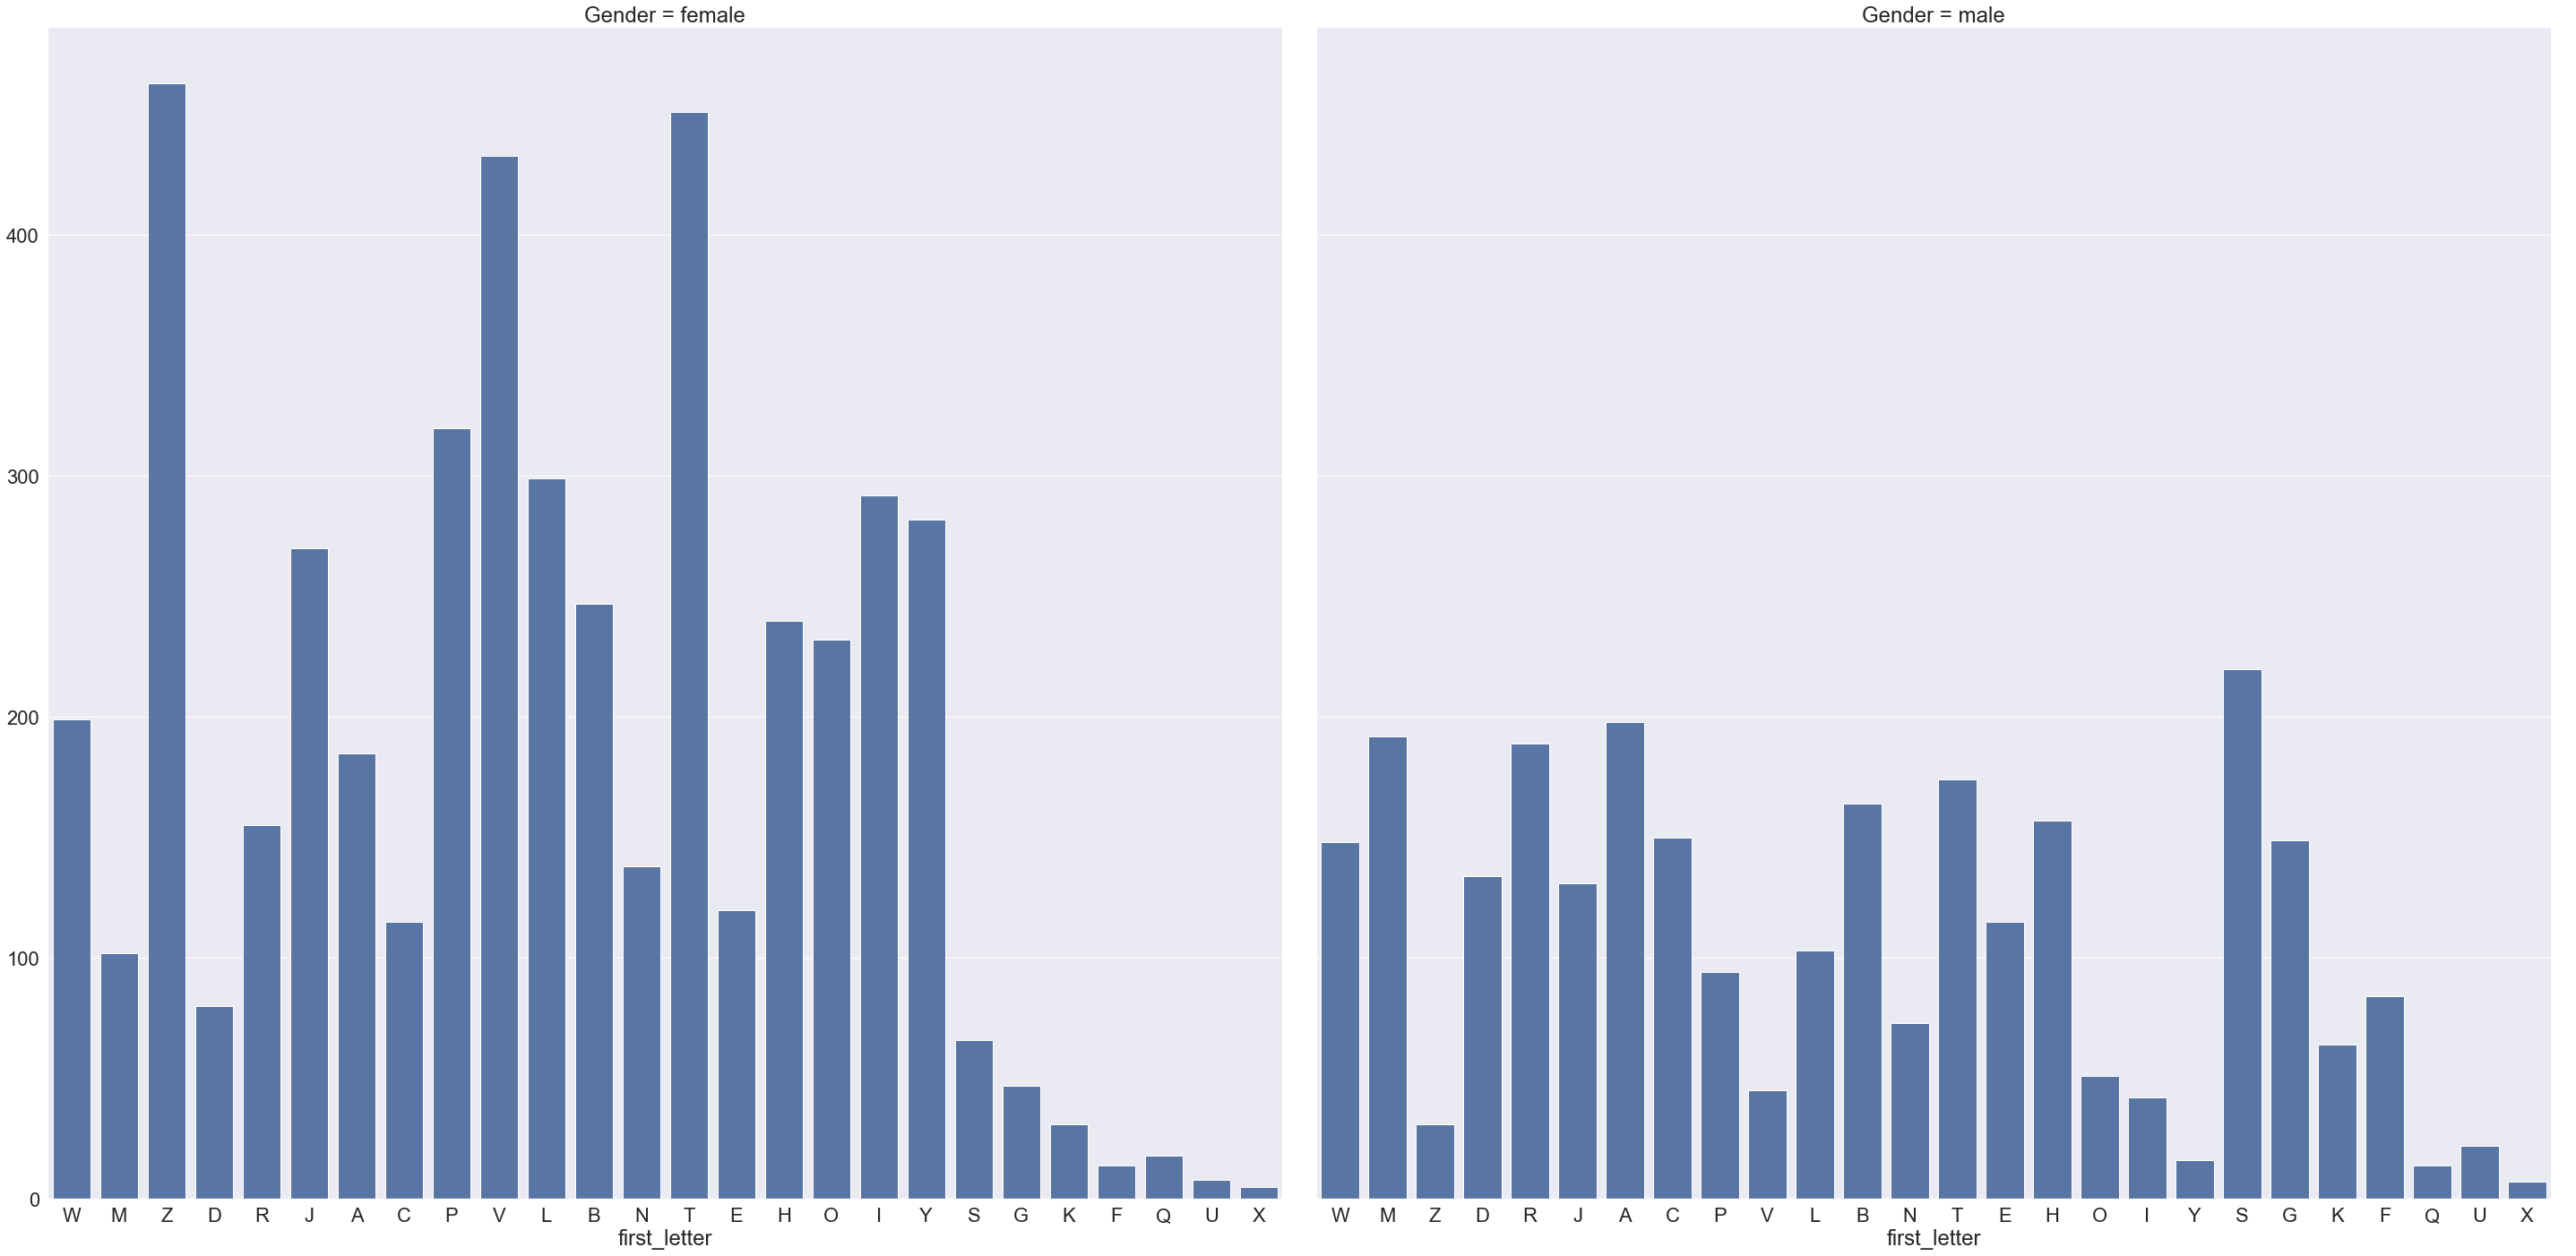

In [17]:
# Here we split the genders first and last letters per gender

cond_plot = sns.FacetGrid(data=data, col='Gender', size=20)
cond_plot.map(sns.countplot, 'last_letter', color="m").add_legend()
plt.tight_layout()
plt.show()

cond_plot = sns.FacetGrid(data=data, col='Gender', size=20)
cond_plot.map(sns.countplot, 'first_letter').add_legend()
plt.tight_layout()
plt.show()

## Looking at the plot above we can see that the first and last letter can be a good predictive of the gender


/Users/karim/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/Users/karim/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


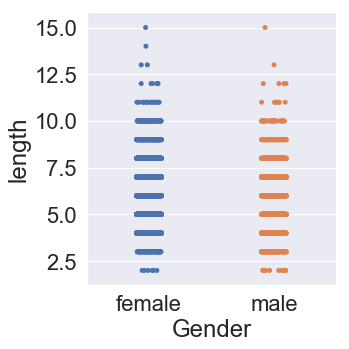

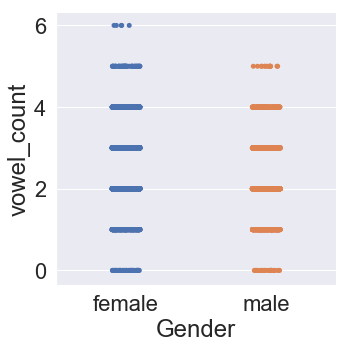

In [18]:

# Explore the numarical columns from our data above

for var, subplot in zip(num_cols, ax.flatten()):
    sns.catplot(x='Gender', y=var, data=data, ax=subplot)

### Setting up feautures to the test,train and dev test.

In [19]:
# creating test,devtest, and train names 
test_names = classify_names[:500]
devtest_names = classify_names[500:1000]   
train_names =classify_names[1000:]

# create the gender features funcion
def gender_fe(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'prefix1': word[:1],
            'prefix1': word[:2]}

train_set = [(gender_fe(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_fe(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_fe(n), gender) for (n, gender) in test_names]

#### NaiveBayes classifier
Checking the accuracy of the naive bayes classifier.

In [20]:
# Print the accuracy level
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.796


In [47]:
# Checking the wrong guesses
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_fe(name))
    if guess != tag:
        errors.append((tag, guess, name))


for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=female guess=male name=Abbey
correct=female guess=male name=Ajay
correct=female guess=male name=Aleen
correct=female guess=male name=Alisun
correct=female guess=male name=Angil
correct=female guess=male name=Ardeen
correct=female guess=male name=Bamby
correct=female guess=male name=Birgit
correct=female guess=male name=Brit
correct=female guess=male name=Calypso
correct=female guess=male name=Charmion
correct=female guess=male name=Cherish
correct=female guess=male name=Chery
correct=female guess=male name=Chrystal
correct=female guess=male name=Corabel
correct=female guess=male name=Coral
correct=female guess=male name=Darb
correct=female guess=male name=Darby
correct=female guess=male name=Deb
correct=female guess=male name=Dew
correct=female guess=male name=Doloritas
correct=female guess=male name=Doro
correct=female guess=male name=Eden
correct=female guess=male name=Elke
correct=female guess=male name=Fortune
correct=female guess=male name=Franny
correct=female guess=male 

##### After trying the Naive Bayes we see the level of accuracy is around 80% so we will test the decision tree to try to make some improvement.

### Decision Tree

We will check the application of different features in the performance of the DecisionTree model in predicting gender.


with the gender_fe feature the accuracy score is 0.72. gender_features and gender_features1 model is also implemented. The model performed well with the gender_features which incorporated the preffix,suffix and vowels.

In [50]:
# Test the decision tree for devtest set
classifier1 = nltk.DecisionTreeClassifier.train(train_set)
print(nltk.classify.accuracy(classifier1, devtest_set))

0.758


In [52]:
# Test the decision tree for test set
classifier1 = nltk.DecisionTreeClassifier.train(train_set)
print(nltk.classify.accuracy(classifier1, test_set))

0.726


In [26]:
# Checking the wrong guesses
errors = []
for (name, tag) in devtest_names:
    guess = classifier1.classify(gender_fe(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [53]:
for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=female guess=male name=Abbey
correct=female guess=male name=Ajay
correct=female guess=male name=Aleen
correct=female guess=male name=Alisun
correct=female guess=male name=Angil
correct=female guess=male name=Ardeen
correct=female guess=male name=Bamby
correct=female guess=male name=Birgit
correct=female guess=male name=Brit
correct=female guess=male name=Calypso
correct=female guess=male name=Charmion
correct=female guess=male name=Cherish
correct=female guess=male name=Chery
correct=female guess=male name=Chrystal
correct=female guess=male name=Corabel
correct=female guess=male name=Coral
correct=female guess=male name=Darb
correct=female guess=male name=Darby
correct=female guess=male name=Deb
correct=female guess=male name=Dew
correct=female guess=male name=Doloritas
correct=female guess=male name=Doro
correct=female guess=male name=Eden
correct=female guess=male name=Elke
correct=female guess=male name=Fortune
correct=female guess=male name=Franny
correct=female guess=male 

### In decision tree  We still have few wrong names and we will check if we can improve the model below.

In [23]:
# Set up the vowel ratio function between genders.
def vowel_ratio(word):
    if len(re.findall(r'[aeiouy]', word))/len(word)>= 0.8:
        return ".8+"
    elif len(re.findall(r'[aeiouy]', word))/len(word)>= 0.6:
        return "0.6 - 0.8"
    elif len(re.findall(r'[aeiouy]', word))/len(word)>= 0.4:
        return "0.4 - 0.6"
    elif len(re.findall(r'[aeiouy]', word))/len(word)>= 0.2:
        return "0.2 - 0.4"
    else: 
        return "< 0.2"

In [59]:
# Set up train and test variables
train_set_1 = [(gender_fe(n), gender) for (n, gender) in train_names]
devtest_set_1 = [(gender_fe(n), gender) for (n, gender) in devtest_names]
test_set_1 = [(gender_fe(n), gender) for (n, gender) in test_names]

In [60]:
# Retest the decision tree model
classifier_1 = nltk.DecisionTreeClassifier.train(train_set_1)
print(nltk.classify.accuracy(classifier_1, devtest_set_1))

0.758


In [62]:
# Create new gender features funcion to capture all of the different name features
def gender_features1(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'prefix1': word[:1],
            'prefix2': word[:2],
            'prefix3': word[:3],
            'vowels' : vowel_ratio(word)}

In [64]:
### Implementing the gender_features1
import re
re.compile('<title>(.*)</title>')
random.seed(75)
random.shuffle(devtest_set)
train_set1 = [(gender_features1(n), gender) for (n, gender) in train_names]
devtest_set1 = [(gender_features1(n), gender) for (n, gender) in devtest_names]
test_set1 = [(gender_features1(n), gender) for (n, gender) in test_names]

In [65]:
# We test the decision tree model again and see how the accuracy improved with gender features
classifier1 = nltk.DecisionTreeClassifier.train(train_set1)
print(nltk.classify.accuracy(classifier1, train_set1))

0.9599654377880185


In [66]:
# dev test
classifier1 = nltk.DecisionTreeClassifier.train(train_set1)
print(nltk.classify.accuracy(classifier1, devtest_set1))

0.736


In [34]:
# test
classifier1 = nltk.DecisionTreeClassifier.train(train_set1)
print(nltk.classify.accuracy(classifier1, test_set1))

0.722


The devtest set has a little more accuracy in the decision tree model than the test set it is 0.73 vs. 0.72.

In [35]:
# Checking the wrong guesses
errors = []
for (name, tag) in devtest_names:
    guess = classifier1.classify(gender_features1(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [36]:
for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=female guess=male name=Abbey
correct=female guess=male name=Agace
correct=female guess=male name=Ajay
correct=female guess=male name=Alfie
correct=female guess=male name=Andrea
correct=female guess=male name=Angil
correct=female guess=male name=Biddy
correct=female guess=male name=Bryn
correct=female guess=male name=Charmion
correct=female guess=male name=Chery
correct=female guess=male name=Chrissy
correct=female guess=male name=Daffie
correct=female guess=male name=Darby
correct=female guess=male name=Doloritas
correct=female guess=male name=Doro
correct=female guess=male name=Eden
correct=female guess=male name=Franny
correct=female guess=male name=Gay
correct=female guess=male name=Ginger
correct=female guess=male name=Giorgia
correct=female guess=male name=Haily
correct=female guess=male name=Harmony
correct=female guess=male name=Harriot
correct=female guess=male name=Hedy
correct=female guess=male name=Hildagard
correct=female guess=male name=Hildegaard
correct=female gu

### MaximumEntropy
Maximum entropy model performed well aster applying gender_features.The highest accuracy in the training set was 0.93,compared to gender_fe1 which has 0.80.

In [37]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'prefix1': word[:1],
            'prefix2': word[:2],
            'prefix3': word[:3],
            'vowels' : vowel_ratio(word)}

In [38]:
### Implementing the gender_features
random.seed(75)
random.shuffle(devtest_set)
train_set2 = [(gender_features2(n), gender) for (n, gender) in train_names]
devtest_set2 = [(gender_features2(n), gender) for (n, gender) in devtest_names]
test_set2 = [(gender_features2(n), gender) for (n, gender) in test_names]

In [67]:
# run the MaxentClassifier
mx_entropy = nltk.MaxentClassifier.train(train_set2)

print("train_set: ", nltk.classify.accuracy(mx_entropy, train_set2))
print("test_set: ", nltk.classify.accuracy(mx_entropy, test_set2))
print("devtest_set: ", nltk.classify.accuracy(mx_entropy, devtest_set2))

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.375
             2          -0.40355        0.828
             3          -0.32972        0.861
             4          -0.29233        0.877
             5          -0.26902        0.885
             6          -0.25262        0.891
             7          -0.24018        0.895
             8          -0.23027        0.899
             9          -0.22208        0.904
            10          -0.21515        0.907
            11          -0.20915        0.910
            12          -0.20390        0.912
            13          -0.19923        0.913
            14          -0.19504        0.915
            15          -0.19126        0.915
            16          -0.18781        0.916
            17          -0.18466        0.918
            18          -0.18176        0.919
            19          -0.17907        0.919
 

In [68]:

# create the gender features funcion
train_set3 = [(gender_fe(n), gender) for (n, gender) in train_names]
devtest_set3 = [(gender_fe(n), gender) for (n, gender) in devtest_names]
test_set3 = [(gender_fe(n), gender) for (n, gender) in test_names]

In [69]:
# run the MaxentClassifier on train set3
mx_entropy1 = nltk.MaxentClassifier.train(train_set3)

print("train_set: ", nltk.classify.accuracy(mx_entropy, train_set3))
print("test_set: ", nltk.classify.accuracy(mx_entropy, test_set3))
print("devtest_set: ", nltk.classify.accuracy(mx_entropy, devtest_set3))

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.375
             2          -0.37143        0.815
             3          -0.32659        0.824
             4          -0.30757        0.829
             5          -0.29675        0.833
             6          -0.28959        0.834
             7          -0.28441        0.836
             8          -0.28045        0.836
             9          -0.27731        0.840
            10          -0.27474        0.840
            11          -0.27261        0.840
            12          -0.27080        0.840
            13          -0.26926        0.840
            14          -0.26791        0.841
            15          -0.26674        0.841
            16          -0.26570        0.840
            17          -0.26478        0.840
            18          -0.26395        0.840
            19          -0.26321        0.840
 

A feature named gender_features_v was created to see the performance of different model only focusing on the vowels, consonents, first and last letter of the names.

In [42]:
### Concentrating on vowels:
def gender_features_v(name):
    
    # last letter, first letter, vowel last/first letter
    first_letter = name[0]
    vowel_first_letter = first_letter in 'aeiou'
    last_letter = name[-1]
    next_to_last_letter = name[-2]
    vowel_last_letter = last_letter in 'aeiou'
    
    # vowels/consonants
    vowels = "".join(sorted(list(set(re.sub(r'[^aeiou]', '', name)))))
    consonants = "".join(sorted(list(set(re.sub(r'[aeiou]', '', name)))))
    
 
    # syllables
    syllables = len(SSP.tokenize(name))
    
    return {
        'first_letter': first_letter,
        'vowel_first_letter': vowel_first_letter,
        'last_letter': last_letter,
        'next_to_last_letter': next_to_last_letter,
        'vowel_last_letter': vowel_last_letter,
        'vowels': vowels,
        'consonants': consonants,                    
        'syllables': syllables
    
    }

Naive Bayes, Decision Tree and Maximum Entropy underperforms with this particular feature.

gender_features function yields to better accuracy to the bayes, decision tree and maximum entropy model.It has been vectorized to implement on the decision tree model from the Scikit learn.

In [71]:
# Vectorize the features function
features = np.vectorize(gender_fe)
print(features(["Anna", "Hannah", "Peter","John","Vladmir"]))

[{'suffix1': 'a', 'suffix2': 'na', 'prefix1': 'An'}
 {'suffix1': 'h', 'suffix2': 'ah', 'prefix1': 'Ha'}
 {'suffix1': 'r', 'suffix2': 'er', 'prefix1': 'Pe'}
 {'suffix1': 'n', 'suffix2': 'hn', 'prefix1': 'Jo'}
 {'suffix1': 'r', 'suffix2': 'ir', 'prefix1': 'Vl'}]


In [72]:
df_y = data['Gender']

In [73]:
df_X = features(data['name'])

In [74]:
from sklearn.feature_extraction import DictVectorizer
 
corpus = features(["Mike", "Julia"])
dv = DictVectorizer()
dv.fit(corpus)
transformed = dv.transform(corpus)
print(transformed)

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0


In [75]:
from sklearn.model_selection import train_test_split
# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

In [76]:
dfX_train

array([{'suffix1': 'a', 'suffix2': 'na', 'prefix1': 'Fl'},
       {'suffix1': 'a', 'suffix2': 'na', 'prefix1': 'Ka'},
       {'suffix1': 'd', 'suffix2': 'ud', 'prefix1': 'Eh'}, ...,
       {'suffix1': 'a', 'suffix2': 'la', 'prefix1': 'Ag'},
       {'suffix1': 'y', 'suffix2': 'ty', 'prefix1': 'Pa'},
       {'suffix1': 'y', 'suffix2': 'ty', 'prefix1': 'Mi'}], dtype=object)

In [291]:
dv = DictVectorizer()
dv.fit_transform(dfX_train)

<5077x2978 sparse matrix of type '<class 'numpy.float64'>'
	with 35539 stored elements in Compressed Sparse Row format>

In [296]:
# Shuffle and split:  train, dev-test, test 
from sklearn.utils import shuffle
X,y = shuffle(df_X,df_y)

dfX_test, dfX_dev_test, dfX_train = X[:500], X[500:1000], X[1000:]
dfy_test, dfy_dev_test, dfy_train = y[:500], y[500:1000], y[1000:]

print("test: " , len(dfX_test))
print("devtest: ", len(dfX_dev_test))
print("train: ", len(dfX_train))


test:  500
devtest:  500
train:  6579


In [307]:
# Use vectorizer to transform the features into feature-vectors.
from sklearn.feature_extraction import DictVectorizer

print(features(['Julia', 'Mike']))

# train the vectorizer to know the possible features and values.
vectorizer = DictVectorizer()
vectorizer.fit(dfX_train)

transform = vectorizer.transform(features(['Julia', 'Mike']))
print(transform)
print(type(transform))
print(transform.toarray()[0][12])
print(vectorizer.feature_names_[12])

[{'suffix1': 'a', 'suffix2': 'ia', 'suffix3': 'lia', 'prefix1': 'J', 'prefix2': 'Ju', 'prefix3': 'Jul', 'vowels': '0.6 - 0.8'}
 {'suffix1': 'e', 'suffix2': 'ke', 'suffix3': 'ike', 'prefix1': 'M', 'prefix2': 'Mi', 'prefix3': 'Mik', 'vowels': '0.4 - 0.6'}]
  (0, 9)	1.0
  (0, 135)	1.0
  (0, 877)	1.0
  (0, 1541)	1.0
  (0, 1674)	1.0
  (0, 2649)	1.0
  (0, 3292)	1.0
  (1, 12)	1.0
  (1, 155)	1.0
  (1, 1032)	1.0
  (1, 1545)	1.0
  (1, 1700)	1.0
  (1, 2518)	1.0
  (1, 3291)	1.0
<class 'scipy.sparse.csr.csr_matrix'>
0.0
prefix1=M


In [308]:
###Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# DT classifier to extract discriminating rules from the features. 
DT_classifier = DecisionTreeClassifier()

DT_classifier.fit(vectorizer.transform(dfX_train), dfy_train)

DecisionTreeClassifier()

In [299]:

print(DT_classifier.predict(vectorizer.transform(features(["Sebastian", "Amy"]))))

['male' 'female']


In [300]:

# Accuracy
print("Accuracy on training set: ", DT_classifier.score(vectorizer.transform(dfX_train), dfy_train))
print("Accuracy on dev-test set: ",DT_classifier.score(vectorizer.transform(dfX_dev_test), dfy_dev_test))
print("Accuracy on test set: ",DT_classifier.score(vectorizer.transform(dfX_test), dfy_test))

Accuracy on training set:  0.9977200182398541
Accuracy on dev-test set:  0.83
Accuracy on test set:  0.822


The accuracy level in the decision tree model from the Scikit learn is higher than the decision tree model from the nltk. 

The training set accuracy is higher than the dev test set and the test set.Decision tree, Naive Bayes and Maximum Entropy models performed well with the training sets. The accuracy level of devtest set and the test set is pretty similar for instance in the decision tree model the test set accuracy is 0.726 and the devtest set is 0.72.